In [1]:
import pandas as pd
import numpy as np
fire_incidents = pd.read_csv("FireIncidents.csv")
fire_incidents.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [69]:
filtered = fire_incidents.filter(["type_description","neighborhood"])
filtered.head()

,type_description,neighborhood
0,Building fire,NaN
1,Building fire,NaN
2,Passenger vehicle fire,NaN
3,Passenger vehicle fire,Fineview
4,Building fire,Fairywood


In [70]:
grouped = filtered.groupby("neighborhood").count()
grouped.head()

,type_description
neighborhood,
Allegheny Center,46
Allegheny West,32
Allentown,89
Arlington,39
Arlington Heights,9


In [112]:
fewest_fires = grouped.nsmallest(10, "type_description")
fewest_fires.rename(columns = {'type_description' : 'Fires'}, inplace = True)
fewest_fires

,Fires
neighborhood,
Mount Oliver Borough,4
East Carnegie,6
Regent Square,6
Mt. Oliver,7
Arlington Heights,9
Oakwood,10
Chartiers City,11
Hays,11
St. Clair,11


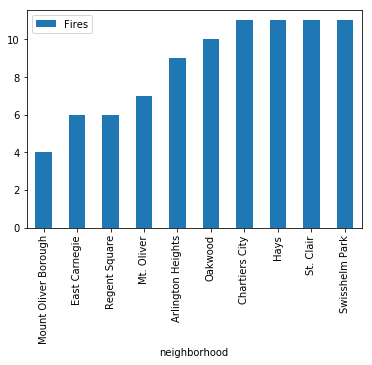

In [72]:
fewest_fires.plot(kind='bar')

Go back to the original dataframe, keeping the important stuff

In [2]:
simplified = fire_incidents.filter(["incident_type","type_description","neighborhood"])
simple = simplified.dropna()
simple.head()

,incident_type,type_description,neighborhood
3,131.0,Passenger vehicle fire,Fineview
4,111.0,Building fire,Fairywood
5,150.0,"Outside rubbish fire, Other",South Side Flats
6,113.0,"Cooking fire, confined to container",Allegheny Center
7,111.0,Building fire,Lincoln-Lemington-Belmar


Get rid of vehicle fires and contained fires, which are often not fire saftey issues, but due to human error.

In [4]:
recent_fires = simple[(simple["incident_type"] <= 112) |
                            ((simple["incident_type"] >= 120) & (simple["incident_type"] <= 123)) |
                            (simple["incident_type"] >= 141)]
recent_fires.head()

,incident_type,type_description,neighborhood
4,111.0,Building fire,Fairywood
5,150.0,"Outside rubbish fire, Other",South Side Flats
7,111.0,Building fire,Lincoln-Lemington-Belmar
8,111.0,Building fire,Carrick
10,151.0,"Outside rubbish, trash or waste fire",Allentown


Count the number of fires in each neighborhood, name that column "Fires"

Sort by smallest and show a graph. Do the same for largest.

In [18]:
neighborhood_sort = recent_fires.groupby("neighborhood").count()
least_fires = neighborhood_sort.nsmallest(10, "incident_type")
least_fires = least_fires.filter(["type_description"])
least_fires.rename(columns = {'type_description' : 'Fires'}, inplace = True)
least_fires

,Fires
neighborhood,
Arlington Heights,3
East Carnegie,3
Glen Hazel,3
Mount Oliver Borough,3
Regent Square,4
Ridgemont,4
St. Clair,4
Chartiers City,6
Fairywood,6


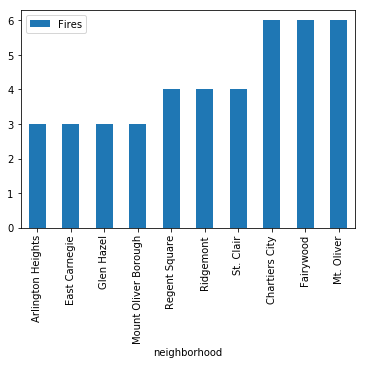

In [13]:
least_fires.plot(kind='bar')

In [19]:
neighborhood_sort = recent_fires.groupby("neighborhood").count()
most_fires = neighborhood_sort.nlargest(10, "incident_type")
most_fires = most_fires.filter(["type_description"])
most_fires.rename(columns = {'type_description' : 'Fires'}, inplace = True)
most_fires

,Fires
neighborhood,
Carrick,135
Hazelwood,108
South Side Flats,88
Central Business District,87
Brookline,84
Homewood North,84
Sheraden,84
Squirrel Hill South,81
Knoxville,80


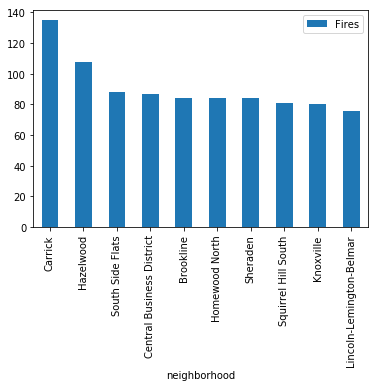

In [20]:
most_fires.plot(kind='bar')